# Clustering con datos categóricos

## Importar bibliotecas

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Datos

In [27]:
data = pd.read_csv('Country clusters.csv')
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## Mapeo de los datos

In [28]:
# Hacemos una copia de los datos originales
data_mapped = data.copy()
# Mapeamos el idioma con 0, 1, 2.
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## Seleccionamos las caracterisiticas

In [29]:
x = data_mapped.iloc[:,3:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## Clustering

In [30]:
# Creamos un objeto Kmeans y pasamos como parametro el numero de clusters que queremos
kmeans = KMeans(3)

In [31]:
# Ajustamos los datos
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

k-mean++ es el método para solucionar la sensibilidad en la elección de las semillas iniciales.

## Resultados de Clustering 

In [32]:
# Creamos una variable con los clusters encontrados
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1], dtype=int32)

In [33]:
# Copiamos los datos
data_with_clusters = data_mapped.copy()
# Y agregamos una columna con los clusters identificados
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,0
1,Canada,62.40,-96.80,0,0
2,France,46.75,2.40,1,2
3,UK,54.01,-2.53,0,2
4,Germany,51.15,10.40,2,2
5,Australia,-25.45,133.11,0,1


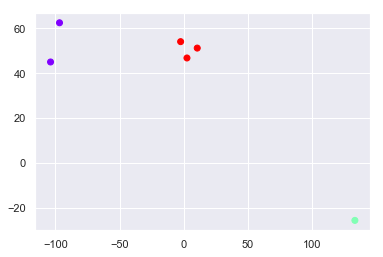

In [34]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],
            c=data_with_clusters['Cluster'],cmap='rainbow')
plt.show()

# Escoger el número de clusters

### WCSS (within-cluster sum of squares)
Mide la distancia entre puntos en un cluster.
Proporciona una regla para decidir el número apropiado de grupos. 

Queremos escoger el cluster con el minimo WCSS. <br>
Pero si todas las observaciones estan cada una en un cluster i.e #observaciones=#clusters entonces WCSS=0=min. <br>
El mismo problema ocurre si todas las observaciones estan en un solo cluster. WSCS=max. <br>
Entonces queremos el valor WCSS más bajo posible.

In [35]:
# Vamos a probar esogiendo todas las columnas
# x = data_mapped.iloc[:,1:4]
# WCSS para la solución actual
kmeans.inertia_

290.10523333333333

In [40]:
# Vamos a crear una lista con todas las posibles soluciones 
wcss=[]

for i in range(1,7):
    # Solucion con i clusters
    kmeans = KMeans(i)
    # Ajustamos los clusters
    kmeans.fit(x)
    # Calculamos WCCS para la solucion
    wcss_iter = kmeans.inertia_
    # Lo guardamos en la lista
    wcss.append(wcss_iter)
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### The Elbow Method

Usando Kmeans, minimizar la distancia entre puntos en un cluster es equivalente a maximizimar la distancia entre clusters. Por eso se llama Elbow Method.

Text(0,0.5,'WCCS')

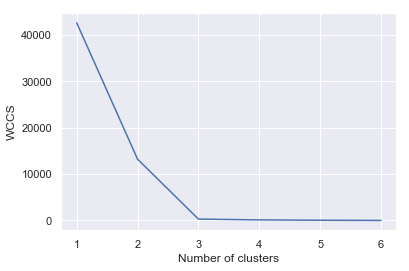

In [37]:
number_clusters = range(1,7)
# Graficamos el numero de clusters vs WCCS
plt.plot(number_clusters,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCCS')

Llega un momento en que incrementar le numero de clusters no reduce significativamente el valor de WCsS. <br>
Tomamos el valor mas grande de clusters para el cual tenemos una reduccion significativa del valor de WCSS
En este caso conviene tomar 3 clusters.


# Otros tipos de Clustering

## Dendogramas

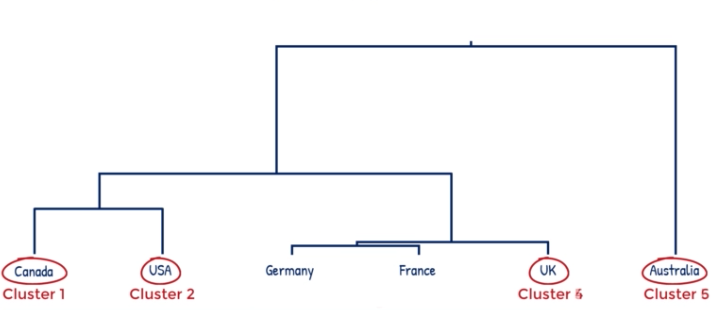

En un dendograma, la distancia entre la líneas horizontales muestra la similitud entre las obseraciones.
<br>
Alemania y Francia son muy similares en terminos de longitud y latitud de acuerdo al dendograma.